In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
project_directory = os.path.dirname(os.getcwd())
raw_matches = os.path.join("data","raw","matches.csv")

In [3]:
df = pd.read_csv(os.path.join(project_directory, raw_matches), index_col=0).reindex()
df.head()

,Day,Date,Home/Away,Opponent,Score,W/L/T,Overtime,Location,Venue,Attendance,Notes,Team,Team Code
0,Sun,10/10/1920,H,Columbus Panhandles,37-0,W,NaN,"Akron, OH",League Park,1500.0,NaN,Akron Pros,aakr
1,Sun,10/24/1920,H,Cleveland Tigers,7-0,W,NaN,"Akron, OH",League Park,5000.0,NaN,Akron Pros,aakr
2,Sun,10/31/1920,A,Canton Bulldogs,10-0,W,NaN,"Canton, OH",Lakeside Athletic Park,6000.0,NaN,Akron Pros,aakr
3,Sun,11/7/1920,A,Rock Island Independents,NaN,-,NaN,"Rock Island, IL",Douglas Park,NaN,Canceled,Akron Pros,aakr
4,Sun,11/7/1920,H,Detroit Heralds,NaN,-,NaN,"Akron, OH",League Park,NaN,Canceled,Akron Pros,aakr


In [10]:
df['Date'] = pd.to_datetime(df.Date)
df[['Team Score', 'Opponent Score']] = df.Score.str.split('-', expand=True)

df.dropna(axis=0, subset=['Score'], inplace=True)

df = df.loc[df.Date >= "1922-1-1"].reindex()
df.head()

,index,Day,Date,Home/Away,Opponent,Score,W/L/T,Overtime,Location,Venue,Attendance,Notes,Team,Team Code,Team Score,Opponent Score
0,0,Sun,1922-10-01,H,Louisville Brecks,38-0,W,NaN,"Canton, OH",Lakeside Park,3000.0,NaN,Canton Bulldogs,can,38,0
1,1,Sun,1922-10-08,A,Dayton Triangles,0-0,T,NaN,"Dayton, OH",Triangle Park,3000.0,NaN,Canton Bulldogs,can,0,0
2,2,Sun,1922-10-15,H,Oorang Indians,14-0,W,NaN,"Canton, OH",Lakeside Park,7000.0,NaN,Canton Bulldogs,can,14,0
3,3,Sun,1922-10-22,A,Akron Pros,22-0,W,NaN,"Akron, OH",Elk's Field,7000.0,NaN,Canton Bulldogs,can,22,0
4,4,Sun,1922-10-29,A,Chicago Bears,7-6,W,NaN,"Chicago, IL",Cubs Park,10000.0,NaN,Canton Bulldogs,can,7,6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5582 entries, 0 to 5581
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           5582 non-null   int64         
 1   Day             5582 non-null   object        
 2   Date            5582 non-null   datetime64[ns]
 3   Home/Away       5582 non-null   object        
 4   Opponent        5582 non-null   object        
 5   Score           5582 non-null   object        
 6   W/L/T           5582 non-null   object        
 7   Overtime        2 non-null      object        
 8   Location        5582 non-null   object        
 9   Venue           5581 non-null   object        
 10  Attendance      5314 non-null   float64       
 11  Notes           135 non-null    object        
 12  Team            5582 non-null   object        
 13  Team Code       5582 non-null   object        
 14  Team Score      5582 non-null   object        
 15  Oppo

In [12]:
# Generate opponent codes
team_codes = df.groupby(['Team','Team Code']).size().reset_index().drop(columns=[0]).set_index(['Team'])
df['Opponent Code'] = df.Opponent.map(team_codes.xs)

KeyError: 'Minneapolis Marines'

<AxesSubplot:ylabel='Frequency'>

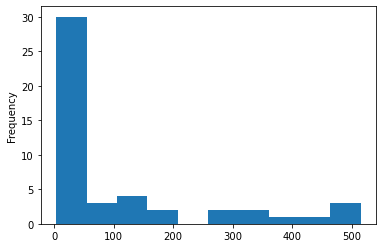

In [13]:
df['Team Code'].value_counts().plot.hist()

In [14]:
sort_by_date = df.sort_values(by=['Date', 'Venue', 'Home/Away'])
sort_by_date.head()

,index,Day,Date,Home/Away,Opponent,Score,W/L/T,Overtime,Location,Venue,Attendance,Notes,Team,Team Code,Team Score,Opponent Score
137,0,Sun,1922-10-01,A,Buffalo All-Americans,0-7,L,NaN,"Buffalo, NY",Buffalo Baseball Park,3500.0,NaN,Hammond Pros,ham,0,7
80,0,Sun,1922-10-01,H,Hammond Pros,7-0,W,NaN,"Buffalo, NY",Buffalo Baseball Park,3500.0,NaN,Buffalo All-Americans,buf,7,0
70,0,Sun,1922-10-01,A,Rock Island Independents,14-19,L,NaN,"Rock Island, IL",Douglas Park,3500.0,NaN,Green Bay Packers,gb,14,19
44,0,Sun,1922-10-01,H,Green Bay Packers,19-14,W,NaN,"Rock Island, IL",Douglas Park,3500.0,NaN,Rock Island Independents,ri,19,14
126,0,Sun,1922-10-01,A,Akron Pros,0-36,L,NaN,"Akron, OH",Elk's Field,3000.0,NaN,Columbus Panhandles,col,0,36


In [15]:
team_codes

,Team Code
Team,
Akron Indians,akr
Akron Pros,akr
Baltimore Colts,bal
Boston Braves,bos
Boston Bulldogs,bos
...,...
St. Louis Cardinals,stl
St. Louis Gunners,stl
Staten Island Stapletons,si


In [19]:
team_codes.loc['Minnneapolis Marines']


Team Code    min
Name: Minnneapolis Marines, dtype: object

In [22]:
team_codes[team_codes.index.str.lower().str.contains('min')]

,Team Code
Team,
Minneapolis Redjackets,min
Minnesota Vikings,min
Minnneapolis Marines,min
